## Importing the necessary modules to be used 

In [26]:
#Importing numpy for fast processing
import numpy as np

#Importing pandas for reading , loading and cleaning the data
import pandas as pd

#Importing malplotlib for graphical representation
import matplotlib.pyplot as plt

#Imporing seaborn to find the correlation between the Dependent and Independent variable
import seaborn as sns

#Importing accuracy score from sklearn to find the performance of the model
from sklearn.metrics import accuracy_score

#Importing classification report  from sklearn to find the precision , recall values 
from sklearn.metrics import classification_report

#Importing Confusion matrix  from sklearn to find the True positive , True Negative , False positive , False negative
from sklearn.metrics import confusion_matrix

#Importing Tree to use a DecisionTreeClassifier 
from sklearn import tree
 
#Importing train_test_split that splits the dataset as training and testing data
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

## Reading the diabetes dataset(took from Kaggle) stored in local system

In [27]:
dataset = pd.read_csv("Diabetes Dataset.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


 ## Data is described to find is there any null values

In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

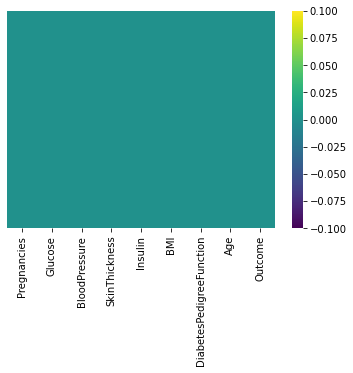

In [5]:
sns.heatmap(dataset.isnull() , cmap = "viridis" , yticklabels = False)

### The heatmap confims that there no null values

## Finding the correlation(How much the Outcome depends upon the features )

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


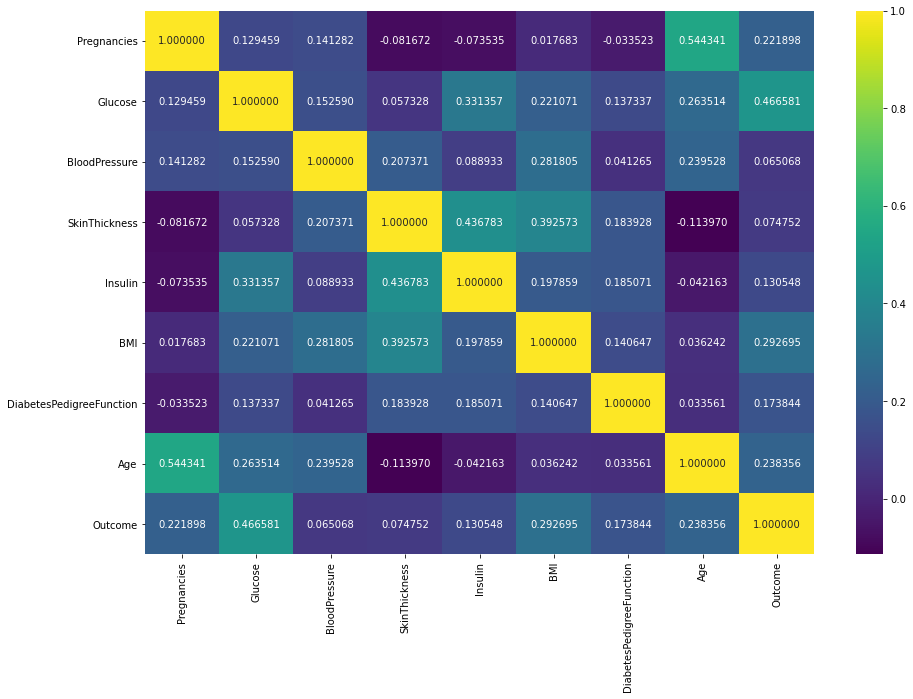

In [6]:
plt.figure(figsize = (15,10))
sns.heatmap(dataset.corr() , cmap = "viridis",annot = True , fmt = "f" )
dataset.corr()

### The features like Glucose , BMI , Age ,Insulin are the major features that the Outcome is dependent on

## Analysing the Result overall with all the features

<AxesSubplot:xlabel='Outcome', ylabel='count'>

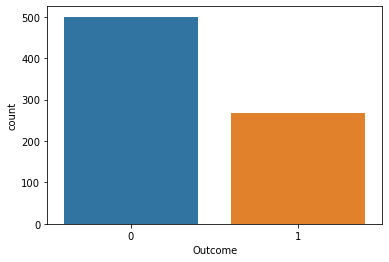

In [7]:
sns.countplot(x = "Outcome" , data = dataset)

### It indicates that out dataset contains diabetic patient less than normal patients

## Age distribution in our dataset

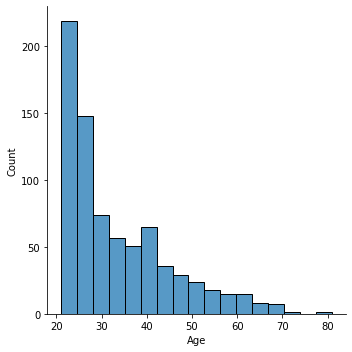

In [8]:
sns.displot(x = "Age" , data = dataset , kde = False)

### The dataset contains data of majority of people between 20 and 40

## Analysing the Outcome with Age factor

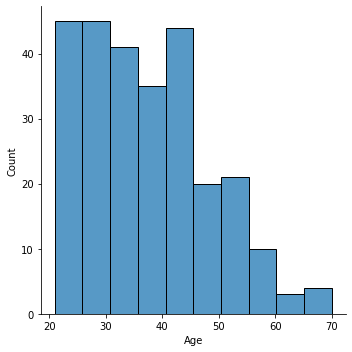

In [9]:
age_Affected = dataset[dataset['Outcome'] == 1]

sns.displot(x = "Age" , data = age_Affected , kde = False)

### People between 20 - 45 are highly affected

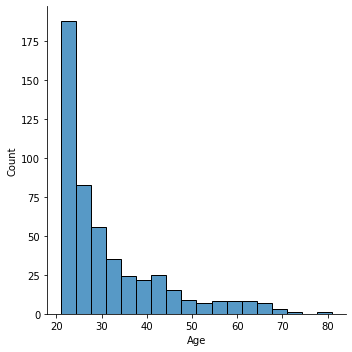

In [10]:
age_Unaffected = dataset[dataset['Outcome'] == 0]

sns.displot(x = "Age" , data = age_Unaffected , kde = False)

## Analysing the missing values if any

In [11]:
print(len(dataset[dataset['BMI'] == 0]))

print(len(dataset[dataset['Glucose'] == 0]))

print(len(dataset[dataset['Insulin'] == 0]))

print(len(dataset[dataset['SkinThickness'] == 0]))

print(len(dataset[dataset['BloodPressure'] == 0]))

11
5
374
227
35


### The missing values are in form of zeros in BMI , Glucose , Insulin , SkinThickness , BloodPressure where practically it can't be so

In [12]:
new_dataset = dataset.copy()

new_dataset
#Copying the dataset without altering the existing one

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Replacing the zeros with NaN values

In [13]:
new_dataset[['Glucose' , 'BMI' , 'BloodPressure' , 'SkinThickness' , 'Insulin']] = new_dataset[['Glucose' , 'BMI' , 'BloodPressure' , 'SkinThickness' , 'Insulin']].replace(0 , np.NaN)

In [14]:
new_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


## Analysing the nan values in form of heatmap for better intuition

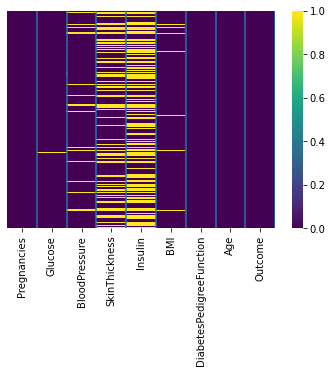

In [15]:
ax = sns.heatmap(new_dataset.isnull() ,cmap = "viridis" , yticklabels = False )

ax.vlines([1,2,3,4,5,6,7,8,9],*ax.get_ylim())

### The NaN values are less in Glucose and high in insulin 

## Replacing the NaN valus with mean values

In [16]:
new_dataset['Glucose'].fillna(new_dataset['Glucose'].mean() , inplace=True)

new_dataset['BMI'].fillna(new_dataset['BMI'].mean() , inplace=True)

new_dataset['BloodPressure'].fillna(new_dataset['BloodPressure'].mean() , inplace=True)

new_dataset['SkinThickness'].fillna(new_dataset['SkinThickness'].mean() , inplace=True)

new_dataset['Insulin'].fillna(new_dataset['Insulin'].mean() , inplace=True)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


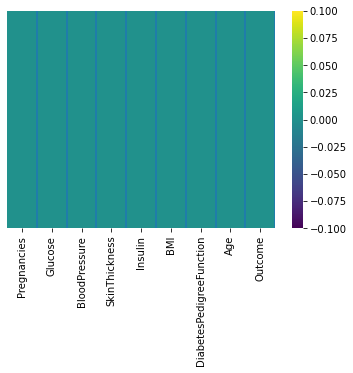

In [17]:
ax = sns.heatmap(new_dataset.isnull() ,cmap = "viridis" , yticklabels = False )

ax.vlines([1,2,3,4,5,6,7,8,9],*ax.get_ylim())

print(new_dataset.isnull().sum())

## Splitting the dataset into Training and Testing

In [18]:
#Random State indicates that each time we run this code we acquire the same testing and training dataset
x_train , x_test , y_train , y_test = train_test_split(new_dataset.drop(['Outcome'] , axis = 1) , new_dataset['Outcome'], random_state = 0)

## Applying Decision Tree Classifier  , Training and Predicting

In [19]:
decision_tree = tree.DecisionTreeClassifier()

decision_tree.fit(x_train , y_train)

y_pred_decision_tree = decision_tree.predict(x_test)

## Analysing the perfomance of the Decision Tree in terms of Accuracy , Confusion Matrix , Precision , Recall

The accuracy using Decision tree is : 76.04166666666666
[[107  23]
 [ 23  39]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       130
           1       0.63      0.63      0.63        62

    accuracy                           0.76       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.76      0.76      0.76       192



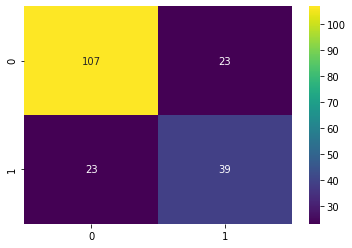

In [20]:
print("The accuracy using Decision tree is :" , accuracy_score(y_test , y_pred_decision_tree) * 100)

print(confusion_matrix(y_test , y_pred_decision_tree))

sns.heatmap(confusion_matrix(y_test , y_pred_decision_tree) , cmap = "viridis" , annot = True , fmt = "d")

print(classification_report(y_test , y_pred_decision_tree))

## Applying Naive Bayes , Training and Predicting

In [22]:
naive_bayes = GaussianNB()

naive_bayes.fit(x_train , y_train)

y_pred_naive_bayes = naive_bayes.predict(x_test)

## Analysing the perfomance of the Naive Bayes in terms of Accuracy , Confusion Matrix , Precision , Recall

The accuracy using Naive Bayes is : 77.08333333333334
[[113  17]
 [ 27  35]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       130
           1       0.67      0.56      0.61        62

    accuracy                           0.77       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.77      0.77       192



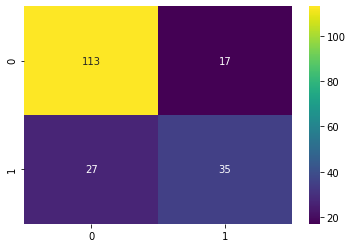

In [28]:
print("The accuracy using Naive Bayes is :" , accuracy_score(y_test , y_pred_naive_bayes) * 100)

print(confusion_matrix(y_test , y_pred_naive_bayes))

sns.heatmap(confusion_matrix(y_test , y_pred_naive_bayes) , cmap = "viridis" , annot = True , fmt = "d")

print(classification_report(y_test , y_pred_naive_bayes))